<div style="width: 100%; padding: 20px;">
    <center>
        <img src="Images/nus_logo.png" width="200" style="margin-bottom: 30px;">
    </center>
    <div style="font-size: 45px; color:#002147; font-weight: bold; text-align: center; margin-bottom: 50px;">
        EE2211 Introduction to Machine Learning
    </div>
    <div style="font-size: 32px; color:#FF6F00; text-align: center; margin-bottom: 30px; font-weight: normal;">
        Optional Python Session (Week 9)
    </div>
    <hr style="border: none; border-top: 2px solid #002147; width: 80%; margin: 0 auto 30px auto;">
    <p style="text-align:right; font-size: 18px; font-weight: normal; margin-right: 20px;">
        <strong>Mr. ZHU, Zikun</strong><br>
        Department of Electrical and Computer Engineering
    </p>
</div>

# Recap for Week 8:
- Quick Review on Numerical Computing with NumPy (<ins>Num</ins>erical <ins>Py</ins>thon)
- Revisiting Lec 4 Demo Code
    - Transpose and rank
    - Product and inverse
    - Even-determined system (m = d)
    - Over-determined system (m > d)
    - Under-determined system (m < d)
- Revisiting Lec 5 Demo Code
    - Linear Regression (with One Output)
    - Linear Regression with Multiple Outputs
- Revisiting Lec 6 Demo Code
    - Linear Regression for Classification
    - Ridge Regression
    - Polynomial Regression  


# Question from Last Week's Session

Q: I have an even-determined system, how do I solve it?

Note that a square matrix that is invertible has its inverse that is the same as its left inverse and right inverse. Hence, all 3 formulae work!

$$(\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T = (\mathbf{X}^{-1}) (\mathbf{X}^T)^{-1} \mathbf{X}^T = \mathbf{X}^{-1}$$

$$\mathbf{X}^T (\mathbf{X} \mathbf{X}^T)^{-1} = \mathbf{X}^T (\mathbf{X}^T)^{-1} \mathbf{X}^{-1} = \mathbf{X}^{-1}$$

# Decision Tree for Solving Linear Regression

To solve a linear regression problem, follow this decision tree based on the relationship between the number of training samples ($m$) and the number of features ($d$):

- **Start**
  - **Is $m = d$?**
    - **Yes**
      - **Is $\mathbf{X}$ invertible?**
        -  **Yes**: <span style="color: red;">Use Normal Equation:  $\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$  (You can use either inverse, left inverse or right inverse and multiply it with $y$)</span> 
        - **No**: Cannot Solve
    - **No**: **Is $m > d$?**
      - **Yes**
        - **Is $\text{rank}(\mathbf{X}) = \text{rank}([\mathbf{X}, \mathbf{y}])$?**
          - **Yes**: Use Normal Equation: $\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$
          - **No**: **Does Left Inverse $\mathbf{X}^\dagger = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T$ Exist?**
            - **Yes**: Use Least Squares Approximation: $\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$
            - **No**: Cannot Solve
    - **No**: **Is $m < d$?**
      - **Yes**
        - **Is $\text{rank}(\mathbf{X}) < \text{rank}([\mathbf{X}, \mathbf{y}])$?**
          - **Yes**: Cannot solve
          - **No**: **Does Right Inverse $\mathbf{X}^\dagger = \mathbf{X}^T (\mathbf{X} \mathbf{X}^T)^{-1}$ Exist?** 
            - **Yes**: Use Minimum Norm Solution: $\mathbf{w} = \mathbf{X}^T (\mathbf{X} \mathbf{X}^T)^{-1} \mathbf{y}$  
            - **No**: Cannot Solve

- **End**

# Lec 7 Code Demo: Polynomial Regression with and without L2 Regularization

In this code demo, we will explore **Polynomial Regression**, both with and without **L2 regularization**. We will generate synthetic data based on a known quadratic relationship, introduce random, irreducible noise to simulate real-world imperfections, and observe how regularization affects the model's performance.

## Step 1: Generate Training Data

We will create a **synthetic training dataset** based on a known quadratic relationship. This dataset will consist of 10 samples with some added random, **irreducible noise** to simulate real-world data imperfections.

### **Ground Truth Formula:**
$$
y = -6 + 5.7x - 0.6x^2 + \text{noise}
$$

- **Purpose:** This formula represents the true relationship between $ x $ and $ y $.
- **Noise:** The random noise added simulates real-world imperfections in data.
- **Note:** This formula is **not** the model we are trying to build. Instead, it is used to generate synthetic data so we can evaluate how well our polynomial regression model can uncover this underlying pattern.

# Understanding Some Important Functions Offered in `Numpy`'s `random` Module

Before we write code for step 1, let's discuss how to generate random numbers using `np.random.random()` and `np.random.randn()`. We will also demonstrate the use of `np.random.seed()` to ensure reproducibility.

#### **1. `np.random.random()`**
- **Purpose**: Generates uniformly distributed random number(s) between 0 and 1.
- **Without input**:
    - When no input is supplied, `np.random.random()` generates a single random number between 0 and 1.
    - **Example**: `np.random.random()` → Generates a single float between 0 and 1.
- **With input**:
    - When an input is supplied (e.g., a shape), `np.random.random(shape)` generates an array of random numbers with the specified shape.
    - **Example**: `np.random.random((2, 3))` → Generates a 2x3 numpy array of random numbers between 0 and 1.

#### **2. `np.random.randn()`**
- **Purpose**: Generates normally distributed random number(s) centered around 0.
- **Without input**:
    - When no input is supplied, `np.random.randn()` generates a single random number from the standard normal distribution (mean = 0, standard deviation = 1).
    - **Example**: `np.random.randn()` → Generates a single float from a standard normal distribution.
- **With input**:
    - When an input is supplied (e.g., a shape), `np.random.randn(shape)` generates an array of random numbers from a standard normal distribution with the specified shape.
    - **Example**: `np.random.randn((2, 3))` → Generates a 2x3 numpy array of random numbers from the standard normal distribution.

--- 

#### **3. `np.random.seed()`**
- **Purpose**: Ensures that the sequence of random numbers generated is the same each time the code is run, making the results reproducible.
- **Input**: You can provide any integer as a seed value. The seed can be any non-negative integer between `0` and `2^32 - 1` (on most systems). If no seed is provided, the seed is initialized from the current system time.
- **Example**: Setting `np.random.seed(2211)` will give the same sequence of random numbers each time the code runs with that seed.
- **Note**: 
    - Declare `np.random.seed()` before generating random numbers if you want reproducibility.
    - If you don't want reproducibility, Python's random module or NumPy's random functions will generate different random numbers each time the code is run (because they rely on the system clock or entropy source to initialize the random number generator)

In [1]:
import numpy as np

# ==============================
# Demo of np.random.seed() for reproducibility
# ==============================
# Set the random seed for reproducibility
np.random.seed(2211)

# ==============================
# Demo np.random.random() - Uniform distribution
# ==============================
# Generate 5 random numbers between 0 and 1 using np.random.random()
print("Generating random numbers using np.random.random() (uniform distribution):")
print(np.random.random(5), np.random.random(5).shape, type(np.random.random(5)))

# ==============================
# Demo np.random.randn() - Standard Normal Distribution
# ==============================
# Generate 5 random numbers from a standard normal distribution using np.random.randn()
print("\nGenerating random numbers using np.random.randn() (standard normal distribution):")
print(np.random.randn(5), np.random.randn(5).shape, type(np.random.randn(5)))

Generating random numbers using np.random.random() (uniform distribution):
[0.01796225 0.18126119 0.75855596 0.82096462 0.97948236] (5,) <class 'numpy.ndarray'>

Generating random numbers using np.random.randn() (standard normal distribution):
[ 0.49606772 -0.36202595 -0.81358831 -0.5601194  -0.2952072 ] (5,) <class 'numpy.ndarray'>


# Shape Transformation between 1D and 2D using `flatten()` and `reshape(-1, 1)`

In this problem, we have one independent variable and one dependent variable. When creating a scatter plot of the data points and fitting a polynomial regression curve, it is natural to think that both the horizontal and vertical axes must have 1D arrays of the same number of elements*. For example, if we have 10 data points in the training set, `x_train` and `y_train` should both have 10 elements. Similarly, for testing data, `x_test` and `y_test` should have the same number of elements (e.g., 80).

However, `poly.fit_transform()` (used for polynomial feature transformation) and functions like one-hot encoding require **2D arrays** as input. For instance, when using one-hot encoding, the class labels must be reshaped into a 2D array. Therefore, we need to understand how to **convert between 1D and 2D arrays**.

---

### Key Functions:
- **`flatten()`**: This function converts a multidimensional array (like 2D) into a 1D array. It is useful when you want to reduce the dimensionality of an array. For instance, applying `flatten()` to a 2D array of shape `(10, 1)` will convert it into a 1D array of shape `(10,)`.

- **`reshape(-1, 1)`**: transforms a 1D array of any size into a 2D array with:
  - As many rows as needed to fit the original number of elements (automatically determined by -1), Exactly 1 column. Hence,
      - **`-1`**: It tells NumPy to automatically determine the appropriate number of rows based on the original size of the array. This value can adapt to different input sizes, making it more flexible.
      - **`1`**: Specifies that the reshaped array will have exactly **1 column**.
  - A 1D array of shape `(10,)` becomes a 2D array of shape `(10, 1)` when reshaped using `reshape(-1, 1)`.

---

**Note: For scatter plots, technically, the size of the axes data should be compared, but we simplify this explanation by always using 1D arrays of the same length.*

In [2]:
# Creating and Transforming Arrays
import numpy as np

# Create 1D and 2D arrays for demonstration
one_d_array = np.array([1, 2, 3, 4, 5])
two_d_array = np.array([[1], 
                        [2], 
                        [3], 
                        [4], 
                        [5]])

# Display the original shapes
print(f"Shape of one_d_array: {one_d_array.shape}")
print(f"Shape of two_d_array: {two_d_array.shape}")

Shape of one_d_array: (5,)
Shape of two_d_array: (5, 1)


In [3]:
# Using flatten()
# Flatten the arrays
print("Flattening arrays...")

# Flatten the 2D array into 1D
flattened_two_d = two_d_array.flatten()

# Display the result
print(f"Flattened two_d_array: {flattened_two_d}")
print(f"Shape after flattening two_d_array: {flattened_two_d.shape}")

Flattening arrays...
Flattened two_d_array: [1 2 3 4 5]
Shape after flattening two_d_array: (5,)


In [4]:
# Using reshape(-1, 1)
# Reshape the 1D array into a 2D array
print("Reshaping arrays...")

# Reshape the 1D array into 2D with one column
reshaped_one_d = one_d_array.reshape(-1, 1)

# Display the result
print(f"Reshaped one_d_array: \n{reshaped_one_d}")
print(f"Shape after reshaping one_d_array: {reshaped_one_d.shape}")

Reshaping arrays...
Reshaped one_d_array: 
[[1]
 [2]
 [3]
 [4]
 [5]]
Shape after reshaping one_d_array: (5, 1)


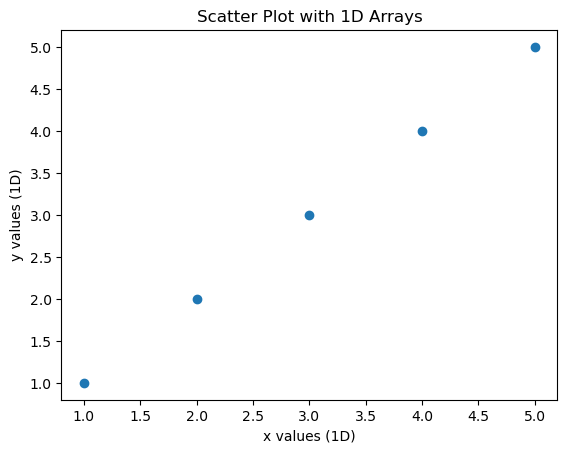

In [5]:
# Scatter Plot Demonstration (Why flatten() is needed)

import matplotlib.pyplot as plt

# Scatter plot with 1D arrays
plt.scatter(one_d_array, one_d_array)
plt.title("Scatter Plot with 1D Arrays")
plt.xlabel("x values (1D)")
plt.ylabel("y values (1D)")
plt.show()

# It is a good practice to call plt.close() after plt.show()
# Show then close means you display the plot first and then free up the resources associated with that figure
# While the plot remains rendered on the screen, the memory resources for future plots are managed efficiently
plt.close()

In [6]:
# Demonstrating poly.fit_transform() Requires 2D Arrays
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

# Trying with 1D array (expect an error)
try:
    poly.fit_transform(one_d_array)
except ValueError as e:
    print(f"Error with 1D array in poly.fit_transform(): {e}")

# Trying with 2D array (correct)
try:
    transformed = poly.fit_transform(reshaped_one_d)
    print("\nSuccess with 2D array in poly.fit_transform()!")
    print(f"Transformed array shape: {transformed.shape}")
except ValueError as e:
    print(f"Error: {e}")

Error with 1D array in poly.fit_transform(): Expected 2D array, got 1D array instead:
array=[1 2 3 4 5].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Success with 2D array in poly.fit_transform()!
Transformed array shape: (5, 3)


In [7]:
# Demonstrating One-Hot Encoding with 2D Array
from sklearn.preprocessing import OneHotEncoder

# Example of categorical data for one-hot encoding
y_class = np.array([0, 1, 0, 1, 2])

# Trying one-hot encoding with 1D array (expect an error)
encoder = OneHotEncoder(sparse_output=False)

try:
    encoder.fit_transform(y_class)
except ValueError as e:
    print(f"Error with 1D array in OneHotEncoder: {e}")

# Reshaping y_class into 2D
y_class_reshaped = y_class.reshape(-1, 1)

# One-hot encoding with reshaped 2D array
onehot_encoded = encoder.fit_transform(y_class_reshaped)
print("\nSuccess with 2D array in OneHotEncoder!")
print(f"One-hot encoded result:\n{onehot_encoded}")
print(f"Shape after one-hot encoding: {onehot_encoded.shape}")

Error with 1D array in OneHotEncoder: Expected 2D array, got 1D array instead:
array=[0 1 0 1 2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Success with 2D array in OneHotEncoder!
One-hot encoded result:
[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Shape after one-hot encoding: (5, 3)


In [8]:
# Set random seed for reproducibility
np.random.seed(2211)

# ==============================
# Step 1: Generate Training Data
# ==============================
# Training input features (10 samples)
x_train = np.array([
    [1],
    [2],
    [2.3],
    [2.6],
    [4.6],
    [5.0],
    [5.5],
    [6.2],
    [7.2],
    [7.6]
])

# Training targets with quadratic relationship and random irreducible noise
# Equation: y = -6 + 5.7x - 0.6x^2 + noise
y_train = -6 + 5.7 * x_train.flatten() - 0.6 * (x_train.flatten() ** 2) + np.random.random(x_train.shape[0])

# Question: What are the shapes of x_train, x_train.flatten() and y_train?
# print(f"Shape of x_train: {x_train.shape}")
# print(f"Shape of x_train.flatten(): {x_train.flatten().shape}")
# print(f"Shape of y_train: {y_train.shape}")

# Display training data
print("Training Data (x_train.flatten()):")
print(x_train.flatten())
print("\nTraining Targets (y_train):")
print(y_train)

print(y_train.size)

Training Data (x_train.flatten()):
[1.  2.  2.3 2.6 4.6 5.  5.5 6.2 7.2 7.6]

Training Targets (y_train):
[-0.88203775  3.18126119  4.69455596  5.58496462  8.50348236  8.43652931
  7.65994252  6.42186835  4.85977659  2.99552374]
10


# Let us visualize our training data using a scatter plot.

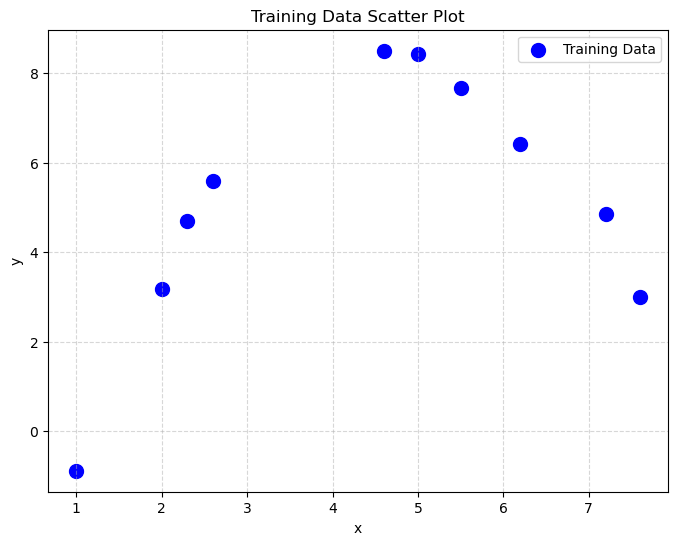

In [9]:
# ==============================
# Data Visualization
# ==============================

# Create a new figure with specified size
plt.figure(figsize=(8, 6))  # Sets the figure size to 8 inches by 6 inches

# Scatter plot for training data
plt.scatter(
    x_train.flatten(),      # Flatten x_train to convert it from 2D to 1D array for plotting 
    y_train,                # Corresponding y_train values
    color='blue',           # Color of the scatter points
    label='Training Data',   # Label for the legend
    s=100,                   # Size of the scatter points
    marker='o'               # Shape of the scatter points (circle)
)

# Set the title of the plot
plt.title('Training Data Scatter Plot')  # Title displayed at the top of the plot

# Label the x-axis
plt.xlabel('x')  # Label for the horizontal axis

# Label the y-axis
plt.ylabel('y')  # Label for the vertical axis

# Add a legend to the plot
plt.legend()  # Displays the legend with labels defined in scatter plot

# Add a grid to the plot for better readability
plt.grid(True, linestyle='--', alpha=0.5)  # Adds a dashed grid with 50% transparency

# Display the plot on the screen
plt.show()  # Renders the plot

# Close the plot to free up memory
plt.close()

## Step 2: Generate Test Data

In addition to the training data, we will generate a **test dataset** to evaluate the performance of our regression models. The test data will also follow the same quadratic relationship with added noise, providing a robust basis for assessing how well our models generalize to unseen data.

In [10]:
# ==============================
# Step 2: Generate Test Data
# ==============================

import numpy as np
import matplotlib.pyplot as plt

# Test input features (from 0 to 8 with step 0.1)
x_test = np.arange(0, 8, 0.1)

# How many samples do we have?
# print(f"Number of samples in x_test: {x_test.size}")

# Test targets with quadratic relationship and random noise
# Equation: y = -6 + 5.7x - 0.6x^2 + noise * 3
y_test = -6 + 5.7 * x_test - 0.6 * (x_test ** 2) + np.random.random(x_test.shape[0]) * 3

# Feature array for plotting the regression curve smoothly
x_plot = np.arange(0, 8, 0.1).reshape(-1, 1)

# Why do we need x_plot? poly.fit_transform() expects 2d array as an input
# print(f"Shape of x_test: {x_test.shape}")
# print(f"Shape of x_plot: {x_plot.shape}")
# print(f"Shape of y_test: {y_test.shape}")

# Display test data
print("Test Data (x_test):")
print(x_test)
print("\nTest Targets (y_test):")
print(y_test)

Test Data (x_test):
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9]

Test Targets (y_test):
[-3.40784471 -3.28601481 -2.73475957 -2.51924366 -0.96162414 -2.6046891
 -0.19337106 -1.47048717 -1.29209031  0.5997718   0.5375418   2.04195158
  2.65150182  1.62519852  3.26190199  2.27135092  2.03093203  2.21580896
  4.84176395  5.34763109  5.8811091   4.44933439  4.88738819  4.24622244
  4.4132098   5.24729157  7.60317096  6.73094508  7.29958461  6.58787129
  7.64475427  6.41244398  7.34379338  8.03673977  8.20350834  7.54740933
  9.43921325  8.48101909  7.92688435  9.78435863  8.28378526  9.76050733
  9.7257564   8.90899299  8.20113125  9.10533723  8.27470987  7.64016729
  8.618536    9.88826772  7.60663109  9.9693880

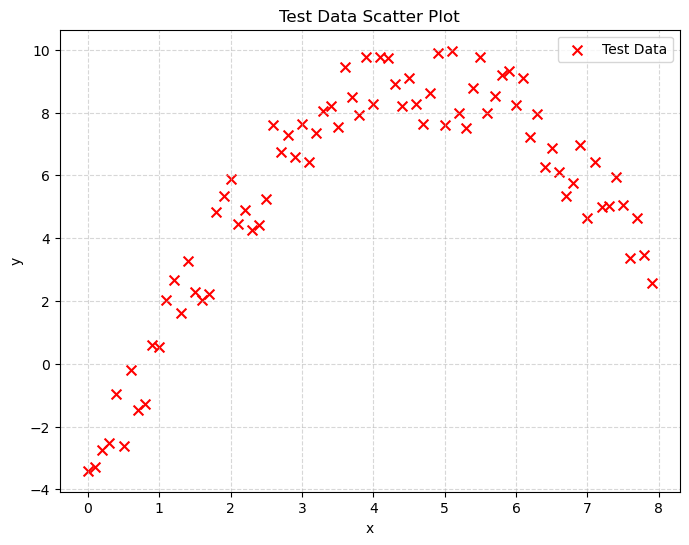

In [11]:
# ------------------------------
# Visualize Test Data Alone
# ------------------------------

# Create a new figure with specified size
plt.figure(figsize=(8, 6))  # Sets the figure size to 8 inches by 6 inches

# Scatter plot for test data
plt.scatter(
    x_test,                  # x_test values for the horizontal axis
    y_test,                  # y_test values for the vertical axis
    color='red',             # Color of the scatter points
    label='Test Data',       # Label for the legend
    s=50,                     # Size of the scatter points
    marker='x'               # Shape of the scatter points (cross)
)

# Set the title of the plot
plt.title('Test Data Scatter Plot')  # Title displayed at the top of the plot

# Label the x-axis
plt.xlabel('x')  # Label for the horizontal axis

# Label the y-axis
plt.ylabel('y')  # Label for the vertical axis

# Add a legend to the plot
plt.legend()  # Displays the legend with labels defined in scatter plot

# Add a grid to the plot for better readability
plt.grid(True, linestyle='--', alpha=0.5)  # Adds a dashed grid with 50% transparency

# Display the plot on the screen
plt.show()  # Renders the plot

# Close the plot to free up memory
plt.close()  # Closes the current figure

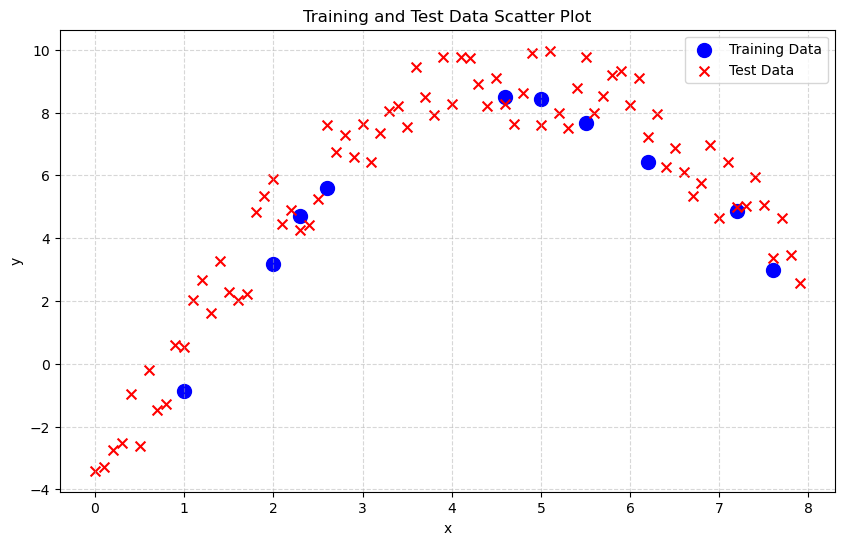

In [12]:
# ------------------------------
# Visualize Training and Test Data Together
# ------------------------------

# Create a new figure with specified size
plt.figure(figsize=(10, 6))  # Sets the figure size to 10 inches by 6 inches

# Scatter plot for training data
plt.scatter(
    x_train.flatten(),      # Flatten x_train to convert it from 2D to 1D array for plotting
    y_train,                # Corresponding y_train values
    color='blue',           # Color of the scatter points
    label='Training Data',   # Label for the legend
    s=100,                   # Size of the scatter points
    marker='o'               # Shape of the scatter points (circle)
)

# Scatter plot for test data
plt.scatter(
    x_test,                  # x_test values for the horizontal axis
    y_test,                  # y_test values for the vertical axis
    color='red',             # Color of the scatter points
    label='Test Data',       # Label for the legend
    s=50,                     # Size of the scatter points
    marker='x'               # Shape of the scatter points (cross)
)

# Set the title of the plot
plt.title('Training and Test Data Scatter Plot')  # Title displayed at the top of the plot

# Label the x-axis
plt.xlabel('x')  # Label for the horizontal axis

# Label the y-axis
plt.ylabel('y')  # Label for the vertical axis

# Add a legend to the plot
plt.legend()  # Displays the legend with labels defined in scatter plots

# Add a grid to the plot for better readability
plt.grid(True, linestyle='--', alpha=0.5)  # Adds a dashed grid with 50% transparency

# Display the plot on the screen
plt.show()  # Renders the plot

# Close the plot to free up memory
plt.close()  # Closes the current figure

## Step 3: Create Polynomial Regressors / Features

In [13]:
# ==============================
# Step 3: Create Polynomial Features
# ==============================

from sklearn.preprocessing import PolynomialFeatures

max_order = 9

# Initialize PolynomialFeatures with the specified maximum degree
# Sets the highest degree of polynomial features to be generated
poly = PolynomialFeatures(max_order)

# Transform the training data into polynomial features
P_train = poly.fit_transform(x_train)  # Fit to training data and transform it

# Transform the testing (plotting) data into polynomial features
P_plot = poly.fit_transform(x_plot)   # Fit to testing (plotting) data and transform it

# Display the shape of the transformed training features
print("Shape of P_train (Training Polynomial Features):", P_train.shape)

# Display the shape of the transformed plotting features
print("Shape of P_plot (Plotting Polynomial Features):", P_plot.shape)

# Optionally, display P_train to understand the feature expansion
# print("\nP_train:")
# print(P_train)

Shape of P_train (Training Polynomial Features): (10, 10)
Shape of P_plot (Plotting Polynomial Features): (80, 10)


## Step 4: Compute Weights Without Regularization

In [14]:
# ==============================
# Step 4: Compute Weights Without Regularization
# ==============================

from numpy.linalg import inv

# Primal Form Formula (No Ridge): w = (P^T P)^(-1) P^T y
# if max_order = 9, we have m = d = 10 -> even-determined system
# if max_order < 9, we have m < d -> under-determined system
# if max_order > 9, we have m > d -> over-determined system
# print(P_train.shape)

w_no_reg = inv(P_train.T @ P_train) @ P_train.T @ y_train

print("Regression Weights Without Regularization:")
print(w_no_reg)

Regression Weights Without Regularization:
[ 7.58520590e+01 -1.90048051e+02  1.71936243e+02 -6.73120763e+01
  8.01354098e+00  2.64449043e+00 -1.14459491e+00  1.80937657e-01
 -1.36074613e-02  4.04709421e-04]


In [15]:
# ==============================
# Step 5: Compute Weights With L2 Regularization (Ridge Regression)
# ==============================

# Define regularization strength (lambda)
regularization_lambda = 1  # You can try different values (e.g., 0.1, 1, 10) to see its effect

# Primal Form Formula with Ridge: w = (P^T P + λI)^(-1) P^T y

# Create the regularization matrix: λI (identity matrix scaled by lambda)
# np.identity(n): 
# This function generates an n x n identity matrix, where n is the input provided. 
# Each diagonal element is 1, and the rest are 0.
lambda_identity = regularization_lambda * np.identity(P_train.shape[1])  # Shape: (10, 10)

w_reg = inv(P_train.T @ P_train + lambda_identity) @ P_train.T @ y_train

# Display the computed regularized regression weights
print("Regression Weights With L2 Regularization (λ = {}):".format(regularization_lambda))
print(w_reg)

Regression Weights With L2 Regularization (λ = 1):
[-4.92149652e-01 -2.35440764e-01  1.15700379e-01  4.13628201e-01
  3.16761667e-01 -2.34250320e-01  4.86876871e-02 -3.77548743e-03
  3.01176960e-05  6.04888177e-06]


## Step 6: Generate Predictions for Plotting

In this step, we will use the computed regression weights from both the **non-regularized** model and the **L2-regularized** model to generate predictions. We will then **plot** these predictions alongside the original training and test data to visualize how well the models fit the data.

In [16]:
# ==============================
# Step 6: Generate Predictions for Plotting
# ==============================

# Use the weights to generate predictions for the plotting data (for visualization)

# Predictions without regularization
y_pred_no_reg = P_plot @ w_no_reg  # Shape: (80, )

# Predictions with L2 regularization
y_pred_reg = P_plot @ w_reg  # Shape: (80, )

# ==============================
# Define a Function for Plotting
# ==============================
def plot_regression(x_train, y_train, x_test, y_test, x_plot, y_pred, title, filename):
    """
    Plots the training and test data along with the regression curve.

    Args:
        x_train (ndarray): Training feature array.
        y_train (ndarray): Training target array.
        x_test (ndarray): Test feature array.
        y_test (ndarray): Test target array.
        x_plot (ndarray): Feature array for plotting predictions.
        y_pred (ndarray): Predicted target values.
        title (str): Title of the plot.
        filename (str): Filename to save the plot.
    """
    plt.figure(figsize=[10, 6])
    plt.rcParams.update({'font.size': 14})
    
    # Scatter plot for training data
    plt.scatter(x_train.flatten(), y_train, s=100, marker='o', color='blue', label='Training Data')
    
    # Scatter plot for test data
    plt.scatter(x_test, y_test, s=50, marker='x', color='red', label='Test Data')
    
    # Plot regression curve (predictions)
    plt.plot(x_plot.flatten(), y_pred, linestyle='--', linewidth=2, color='green', label='Regression Curve')
    
    # Set axis labels and title
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    
    # Draw x=0 and y=0 axes for reference
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    
    # Set plot limits
    plt.xlim(0, 8)
    plt.ylim(-10, 10)
    
    # Add legend
    plt.legend(loc='upper left', fontsize=12)
    
    # Add grid for better readability
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # Save the plot to a file
    plt.savefig(filename)
    print(f"Plot saved as '{filename}'")
    
    # Display the plot
    plt.tight_layout()
    plt.show()
    
    # Close the plot to free up memory
    plt.close()

Plot saved as 'polynomial_regression_no_reg.png'


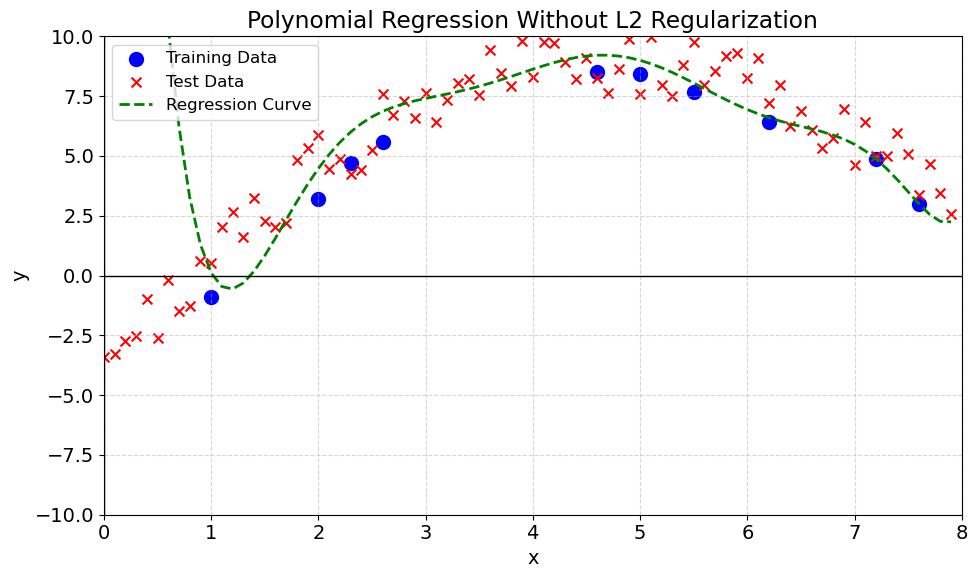

Plot saved as 'polynomial_regression_with_reg.png'


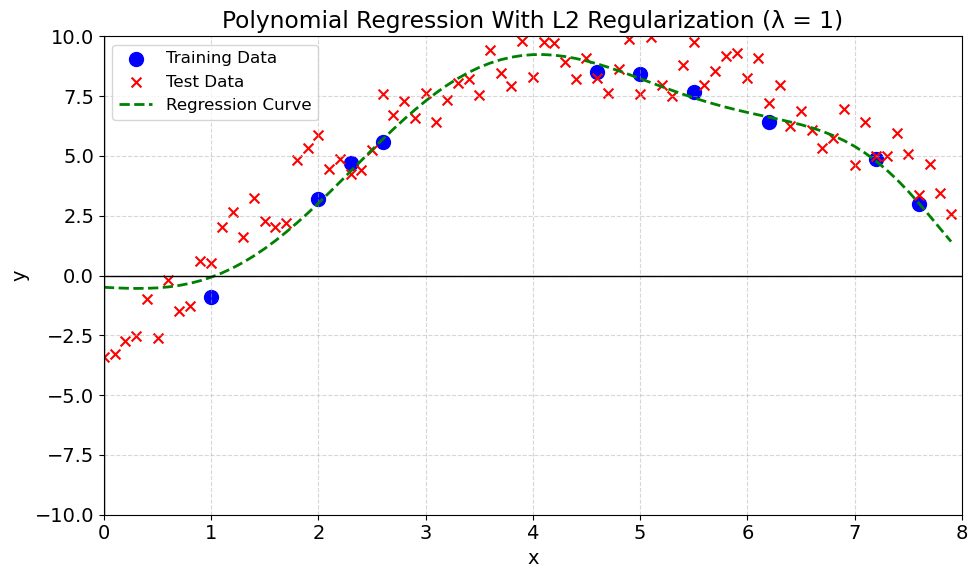

In [17]:
# ==============================
# Plot Predictions Without Regularization
# ==============================
plot_regression(
    x_train, y_train,  # Training data
    x_test, y_test,    # Test data
    x_plot, y_pred_no_reg,  # Predictions (no regularization)
    title='Polynomial Regression Without L2 Regularization',
    filename='polynomial_regression_no_reg.png'
)

# ==============================
# Plot Predictions With L2 Regularization
# ==============================
plot_regression(
    x_train, y_train,  # Training data
    x_test, y_test,    # Test data
    x_plot, y_pred_reg,  # Predictions (with L2 regularization)
    title=f'Polynomial Regression With L2 Regularization (λ = {regularization_lambda})',
    filename='polynomial_regression_with_reg.png'
)

Plot saved as 'polynomial_regression_no_reg.png'.


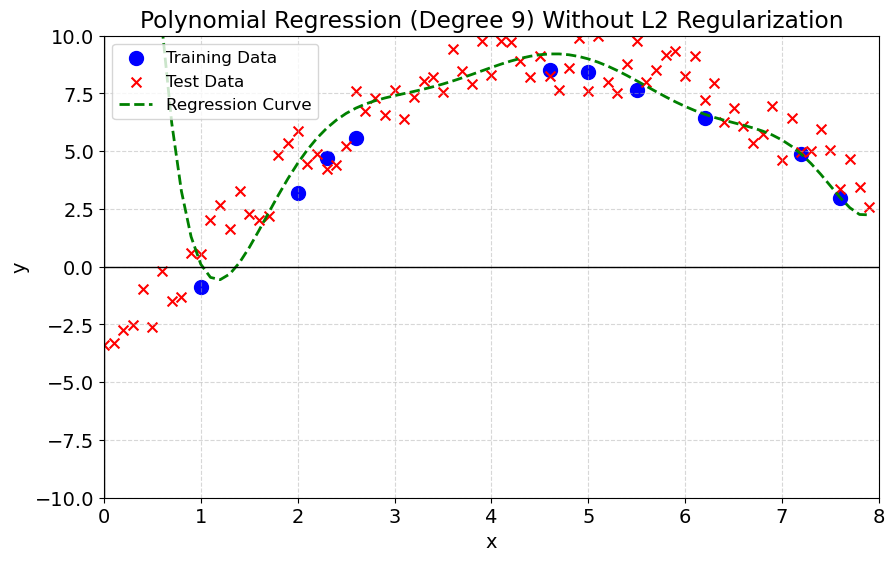

Plot saved as 'polynomial_regression_with_reg.png'.


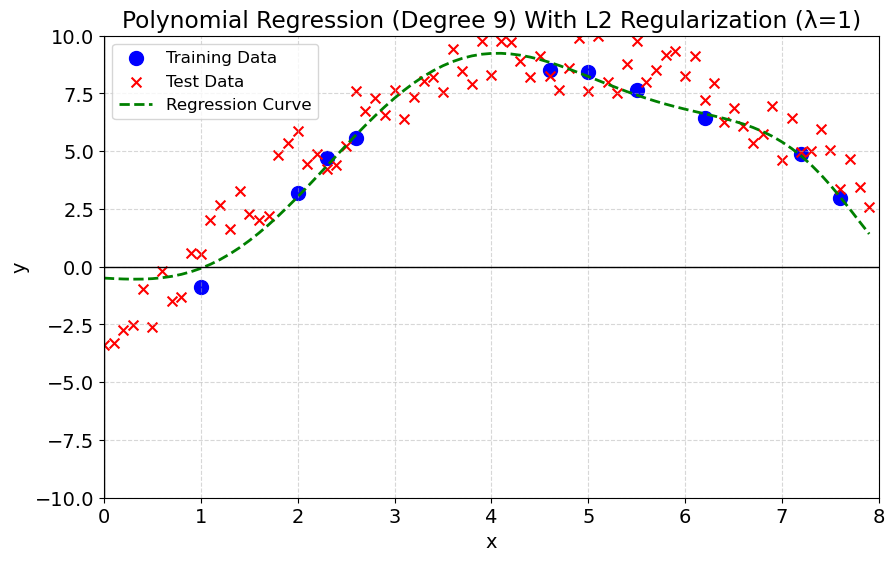


Model Performance on Test Data:
Without Regularization - Mean Squared Error (MSE): 184.5503
With L2 Regularization - Mean Squared Error (MSE): 1.8239


In [18]:
# Combined
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Set random seed for reproducibility
np.random.seed(2211)

# ==============================
# Simulation Parameters
# ==============================
max_order = 9                 # Maximum polynomial degree
regularization_lambda = 1     # Regularization strength (lambda)

# ==============================
# Step 1: Generate Training Data
# ==============================
# Training input features (10 samples)
x_train = np.array([
    [1],
    [2],
    [2.3],
    [2.6],
    [4.6],
    [5.0],
    [5.5],
    [6.2],
    [7.2],
    [7.6]
])

# Training targets with quadratic relationship and random irreducible noise
# Equation: y = -6 + 5.7x - 0.6x^2 + noise
y_train = -6 + 5.7 * x_train.flatten() - 0.6 * (x_train.flatten() ** 2) + np.random.random(x_train.shape[0])

# ==============================
# Step 2: Generate Test Data
# ==============================
# Test input features (from 0 to 8 with step 0.1)
x_test = np.arange(0, 8, 0.1)

# Test targets with quadratic relationship and random noise
# Equation: y = -6 + 5.7x - 0.6x^2 + noise * 3
y_test = -6 + 5.7 * x_test - 0.6 * (x_test ** 2) + np.random.random(x_test.shape[0]) * 3

# Feature array for plotting the regression curve smoothly
x_plot = np.arange(0, 8, 0.1).reshape(-1, 1)

# ==============================
# Step 3: Create Polynomial Features
# ==============================
poly = PolynomialFeatures(max_order)
P_train = poly.fit_transform(x_train)  # Polynomial features for training data
P_plot = poly.fit_transform(x_plot)    # Polynomial features for plotting

# ==============================
# Step 4: Compute Weights Without Regularization
# ==============================
# Primal Form Formula (No Ridge): w = (P^T P)^(-1) P^T y
w_no_reg = inv(P_train.T @ P_train) @ P_train.T @ y_train

# ==============================
# Step 5: Compute Weights With L2 Regularization
# ==============================
# Primal Form Formula (With Ridge): w = (P^T P + λI)^(-1) P^T y
lambda_identity = regularization_lambda * np.identity(P_train.shape[1])
w_reg = inv(P_train.T @ P_train + lambda_identity) @ P_train.T @ y_train

# ==============================
# Step 6: Generate Predictions for Plotting
# ==============================
y_pred_no_reg = P_plot @ w_no_reg    # Predictions without regularization
y_pred_reg = P_plot @ w_reg          # Predictions with L2 regularization

# ==============================
# Step 7: Define Plotting Function
# ==============================
def plot_regression(x_train, y_train, x_test, y_test, x_plot, y_pred, title, filename):
    """
    Plots the training and test data along with the regression curve.

    Args:
        x_train (ndarray): Training feature array.
        y_train (ndarray): Training target array.
        x_test (ndarray): Test feature array.
        y_test (ndarray): Test target array.
        x_plot (ndarray): Feature array for plotting predictions.
        y_pred (ndarray): Predicted target values.
        title (str): Title of the plot.
        filename (str or None): Filename to save the plot. If None, it skips saving.
    """
    plt.figure(figsize=[10, 6])
    plt.rcParams.update({'font.size': 14})
    
    # Scatter plot for training data
    plt.scatter(x_train.flatten(), y_train, s=100, marker='o', color='blue', label='Training Data')
    
    # Scatter plot for test data
    plt.scatter(x_test, y_test, s=50, marker='x', color='red', label='Test Data')
    
    # Plot regression curve
    plt.plot(x_plot.flatten(), y_pred, linestyle='--', linewidth=2, color='green', label='Regression Curve')
    
    # Axis labels and title
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    
    # Draw x=0 and y=0 axes for reference
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    
    # Set plot limits to encompass all data points and regression curves
    plt.xlim(0, 8)
    plt.ylim(-10, 10)
    
    # Legend placement
    plt.legend(loc='upper left', fontsize=12)
    
    # Grid for better readability
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # Save the plot to the specified filename
    # Conditionally save the plot only if a filename is provided
    if filename is not None:
        plt.savefig(filename)
        print(f"Plot saved as '{filename}'.")
    
    # Display the plot on the screen
    plt.show()
    
    # Close the plot to free memory
    plt.close()

# ==============================
# Step 8: Plot Regression Without Regularization
# ==============================
plot_regression(
    x_train, y_train,
    x_test, y_test,
    x_plot, y_pred_no_reg,
    title=f'Polynomial Regression (Degree {max_order}) Without L2 Regularization',
    filename='polynomial_regression_no_reg.png'
)

# ==============================
# Step 9: Plot Regression With L2 Regularization
# ==============================
plot_regression(
    x_train, y_train,
    x_test, y_test,
    x_plot, y_pred_reg,
    title=f'Polynomial Regression (Degree {max_order}) With L2 Regularization (λ={regularization_lambda})',
    filename='polynomial_regression_with_reg.png'
)

# ==============================
# (Optional) Step 10: Evaluate Model Performance
# ==============================
def evaluate_performance(y_true, y_pred, model_name):
    """
    Evaluates the model using Mean Squared Error (MSE).

    Args:
        y_true (ndarray): Actual target values.
        y_pred (ndarray): Predicted target values.
        model_name (str): Name of the model for identification.
    """
    mse = mean_squared_error(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error (MSE): {mse:.4f}")

# Evaluate both models
print("\nModel Performance on Test Data:")
evaluate_performance(y_test, y_pred_no_reg, "Without Regularization")
evaluate_performance(y_test, y_pred_reg, "With L2 Regularization")

## Observations

By comparing the models (order = 9) with and without regularization, we observe:

- **Without Regularization**: The high-degree polynomial fits the training data closely but performs poorly on the testing data due to overfitting.
- **With Regularization**: The regularized model generalizes better to the testing data by addressing overfitting, resulting in a smoother curve that captures the underlying pattern better.

**Key Takeaways**:
- In this code demo, we have seen high-degree polynomials lead to a more complex model which could lead to overfitting.
- Regularization adds a penalty for complexity, encouraging simpler models that generalize better, thereby addressing overfitting.
- The choice of the regularization parameter $\lambda$ is crucial and can be tuned through experimentation.
- Polynomial regression is powerful (it can capture non-linear relationship) but must be used carefully to avoid overfitting.

## Loop Over Polynomial Degrees (1 to 9) and Plot Subplots

In this section, we'll generate and visualize polynomial regression models of degrees 1 through 9. For each degree, we'll:
1. **Generate Polynomial Features** for the specified degree.
2. **Compute Weights** for both the **non-regularized** model and the **L2-regularized** model.
3. **Generate Predictions** using the computed weights.
4. **Visualize the Predictions** as subplots:
   - First 9 subplots: Polynomial regression **without regularization**.
   - Remaining 9 subplots: Polynomial regression **with L2 regularization**.

This will allow us to compare the performance of different polynomial degrees and observe the effects of L2 regularization in preventing overfitting.

In [19]:
import numpy as np

def create_regressors(x, max_order):
    """
    Create polynomial regressors for the input data.

    Parameters:
    x (array-like): Input data, assumed to be an array of length N.
    max_order (int): The maximum polynomial order to create.

    Returns:
    List of 2D arrays: Each array contains regressors for a specific polynomial order.
    """
    P = []  # Initialize an empty list to hold regressors
    
    # Loop through orders from 1 to max_order
    for order in range(1, max_order + 1):
        # Create a 2D array with shape (N, order + 1)
        current_regressors = np.zeros((len(x), order + 1))
        
        # Here, : selects all elements along the specified axis
        current_regressors[:, 0] = np.ones(len(x))  # 0-th column is the bias term (intercept)
        
        # Fill in the columns with polynomial terms
        for i in range(1, order + 1):
            current_regressors[:, i] = np.power(x, i)  # x raised to the power of i
        
        P.append(current_regressors)  # Append the current regressors to the list

    return P  # Return the list of regressor matrices

def estimate_regression_coefficients(P_list, y, reg=None):
    """
    Estimate regression coefficients using provided polynomial regressors.

    Parameters:
    P_list (list): A list of regressor matrices.
    y (array-like): Target values.
    reg (float, optional): Regularization parameter. If None, no regularization is applied.

    Returns:
    List of arrays: Estimated coefficients for each polynomial order.
    """
    w_list = []  # Initialize an empty list for coefficients
    
    for P in P_list:
        # Check if we need to use the dual solution or the primal solution based on the shape of P
        if P.shape[1] > P.shape[0]:  # More features than samples, use dual solution
            w = P.T @ inv(P @ P.T) @ y
        else:  # Use primal solution
            w = inv(P.T @ P) @ P.T @ y
            
        w_list.append(w)  # Append the estimated coefficients

    # If regularization is specified, apply it to the coefficients
    if reg is not None:
        for i in range(len(w_list)):
            P = P_list[i]
            if P.shape[1] > P.shape[0]:  # More features than samples, use dual solution
                w = P.T @ inv(P @ P.T + reg * np.eye(P.shape[1])) @ y
            else:  # Use primal solution
                w = inv(P.T @ P + reg * np.eye(P.shape[1])) @ P.T @ y 
            w_list[i] = w  # Update the coefficient list with regularized weights

    return w_list  # Return the list of estimated coefficients

def perform_prediction(P_list, w_list):
    """
    Perform predictions using regressors and their corresponding coefficients.

    Parameters:
    P_list (list): List of regressor matrices.
    w_list (list): List of estimated coefficients.

    Returns:
    2D array: Predictions for each polynomial order.
    """
    N = P_list[0].shape[0]  # Number of samples
    max_order = len(P_list)  # Number of polynomial orders
    y_predict_mat = np.zeros((N, max_order))  # Initialize prediction matrix

    # Loop through each order to compute predictions
    for order in range(max_order):
        y_predict = np.matmul(P_list[order], w_list[order])  # Matrix multiplication for predictions
        y_predict_mat[:, order] = y_predict  # Store predictions in the matrix

    return y_predict_mat  # Return the matrix of predictions

In [20]:
# Use the same x_train, x_plot, y_train, and regularization_lambda

max_order = 9  # Max polynomial degree to consider

# ==============================
# Create Regressors
# ==============================
P_train = create_regressors(x_train.flatten(), max_order)  # Create polynomial regressors for training data
P_plot = create_regressors(x_plot.flatten(), max_order)    # Create polynomial regressors for plotting data

# Print the regressor matrices for both training and plotting data
print("Regressors for Training Data (P_train):")
for order in range(max_order):
    print(f"Order {order + 1}:\n{P_train[order]}")  # Display the regressor matrix for the current order

print("\nRegressors for Plotting Data (P_plot):")
for order in range(max_order):
    print(f"Order {order + 1}:\n{P_plot[order]}")  # Display the regressor matrix for the current order

Regressors for Training Data (P_train):
Order 1:
[[1.  1. ]
 [1.  2. ]
 [1.  2.3]
 [1.  2.6]
 [1.  4.6]
 [1.  5. ]
 [1.  5.5]
 [1.  6.2]
 [1.  7.2]
 [1.  7.6]]
Order 2:
[[ 1.    1.    1.  ]
 [ 1.    2.    4.  ]
 [ 1.    2.3   5.29]
 [ 1.    2.6   6.76]
 [ 1.    4.6  21.16]
 [ 1.    5.   25.  ]
 [ 1.    5.5  30.25]
 [ 1.    6.2  38.44]
 [ 1.    7.2  51.84]
 [ 1.    7.6  57.76]]
Order 3:
[[  1.      1.      1.      1.   ]
 [  1.      2.      4.      8.   ]
 [  1.      2.3     5.29   12.167]
 [  1.      2.6     6.76   17.576]
 [  1.      4.6    21.16   97.336]
 [  1.      5.     25.    125.   ]
 [  1.      5.5    30.25  166.375]
 [  1.      6.2    38.44  238.328]
 [  1.      7.2    51.84  373.248]
 [  1.      7.6    57.76  438.976]]
Order 4:
[[1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00]
 [1.0000000e+00 2.0000000e+00 4.0000000e+00 8.0000000e+00 1.6000000e+01]
 [1.0000000e+00 2.3000000e+00 5.2900000e+00 1.2167000e+01 2.7984100e+01]
 [1.0000000e+00 2.6000000e+00 6.

In [21]:
# ==============================
# Estimate Regression Coefficients
# ==============================
w_no_reg = estimate_regression_coefficients(P_train, y_train)  # Estimate without regularization
print("Weights without Regularization (w_no_reg):")
for i, w in enumerate(w_no_reg):
    print(f"Degree {i + 1}: {w}")

w_reg = estimate_regression_coefficients(P_train, y_train, regularization_lambda)  # Estimate with regularization
print("\nWeights with Regularization (w_reg):")
for i, w in enumerate(w_reg):
    print(f"Degree {i + 1}: {w}")

Weights without Regularization (w_no_reg):
Degree 1: [2.81300229 0.53013282]
Degree 2: [-6.27894939  6.15881151 -0.64903663]
Degree 3: [-7.21173098  7.08626557 -0.89080172  0.01820433]
Degree 4: [-6.211125    5.52309935 -0.1401896  -0.11766421  0.00817507]
Degree 5: [ 1.73143614 -9.6149333   9.43614304 -2.73854157  0.33124072 -0.01473178]
Degree 6: [-6.72445938e+00  8.73306054e+00 -4.87507288e+00  2.59082760e+00
 -6.93412828e-01  8.33799543e-02 -3.70051945e-03]
Degree 7: [ 2.86767920e+01 -8.00888556e+01  8.03369778e+01 -3.87544084e+01
  1.04089371e+01 -1.58682711e+00  1.28028449e-01 -4.23904699e-03]
Degree 8: [ 1.24563798e+02 -3.41811533e+02  3.63521881e+02 -2.00242964e+02
  6.41471302e+01 -1.23826748e+01  1.41764805e+00 -8.85701619e-02
  2.32428994e-03]
Degree 9: [ 7.00729898e+01 -1.71809863e+02  1.48508214e+02 -5.10007671e+01
  1.14868178e+00  4.47372123e+00 -1.45513663e+00  2.13476369e-01
 -1.55245111e-02  4.53264379e-04]

Weights with Regularization (w_reg):
Degree 1: [1.91234992 0

In [22]:
# ==============================
# Perform Predictions for Plotting
# ==============================

# Generate predictions for each degree using w_no_reg (without regularization)
y_pred_no_reg = perform_prediction(P_plot, w_no_reg)  # Predictions without regularization
print("\nPredictions without Regularization (y_pred_no_reg):")
for i in range(max_order):
    print(f"Degree {i + 1}: {y_pred_no_reg[:, i]}")

# Generate predictions for each degree using w_reg (with L2 regularization)
y_pred_reg = perform_prediction(P_plot, w_reg)  # Predictions with regularization
print("\nPredictions with Regularization (y_pred_reg):")
for i in range(max_order):
    print(f"Degree {i + 1}: {y_pred_reg[:, i]}")


Predictions without Regularization (y_pred_no_reg):
Degree 1: [2.81300229 2.86601558 2.91902886 2.97204214 3.02505542 3.0780687
 3.13108198 3.18409527 3.23710855 3.29012183 3.34313511 3.39614839
 3.44916167 3.50217496 3.55518824 3.60820152 3.6612148  3.71422808
 3.76724136 3.82025465 3.87326793 3.92628121 3.97929449 4.03230777
 4.08532105 4.13833434 4.19134762 4.2443609  4.29737418 4.35038746
 4.40340074 4.45641403 4.50942731 4.56244059 4.61545387 4.66846715
 4.72148043 4.77449372 4.827507   4.88052028 4.93353356 4.98654684
 5.03956012 5.09257341 5.14558669 5.19859997 5.25161325 5.30462653
 5.35763981 5.4106531  5.46366638 5.51667966 5.56969294 5.62270622
 5.67571951 5.72873279 5.78174607 5.83475935 5.88777263 5.94078591
 5.9937992  6.04681248 6.09982576 6.15283904 6.20585232 6.2588656
 6.31187889 6.36489217 6.41790545 6.47091873 6.52393201 6.57694529
 6.62995858 6.68297186 6.73598514 6.78899842 6.8420117  6.89502498
 6.94803827 7.00105155]
Degree 2: [-6.27894939 -5.6695586  -5.073148

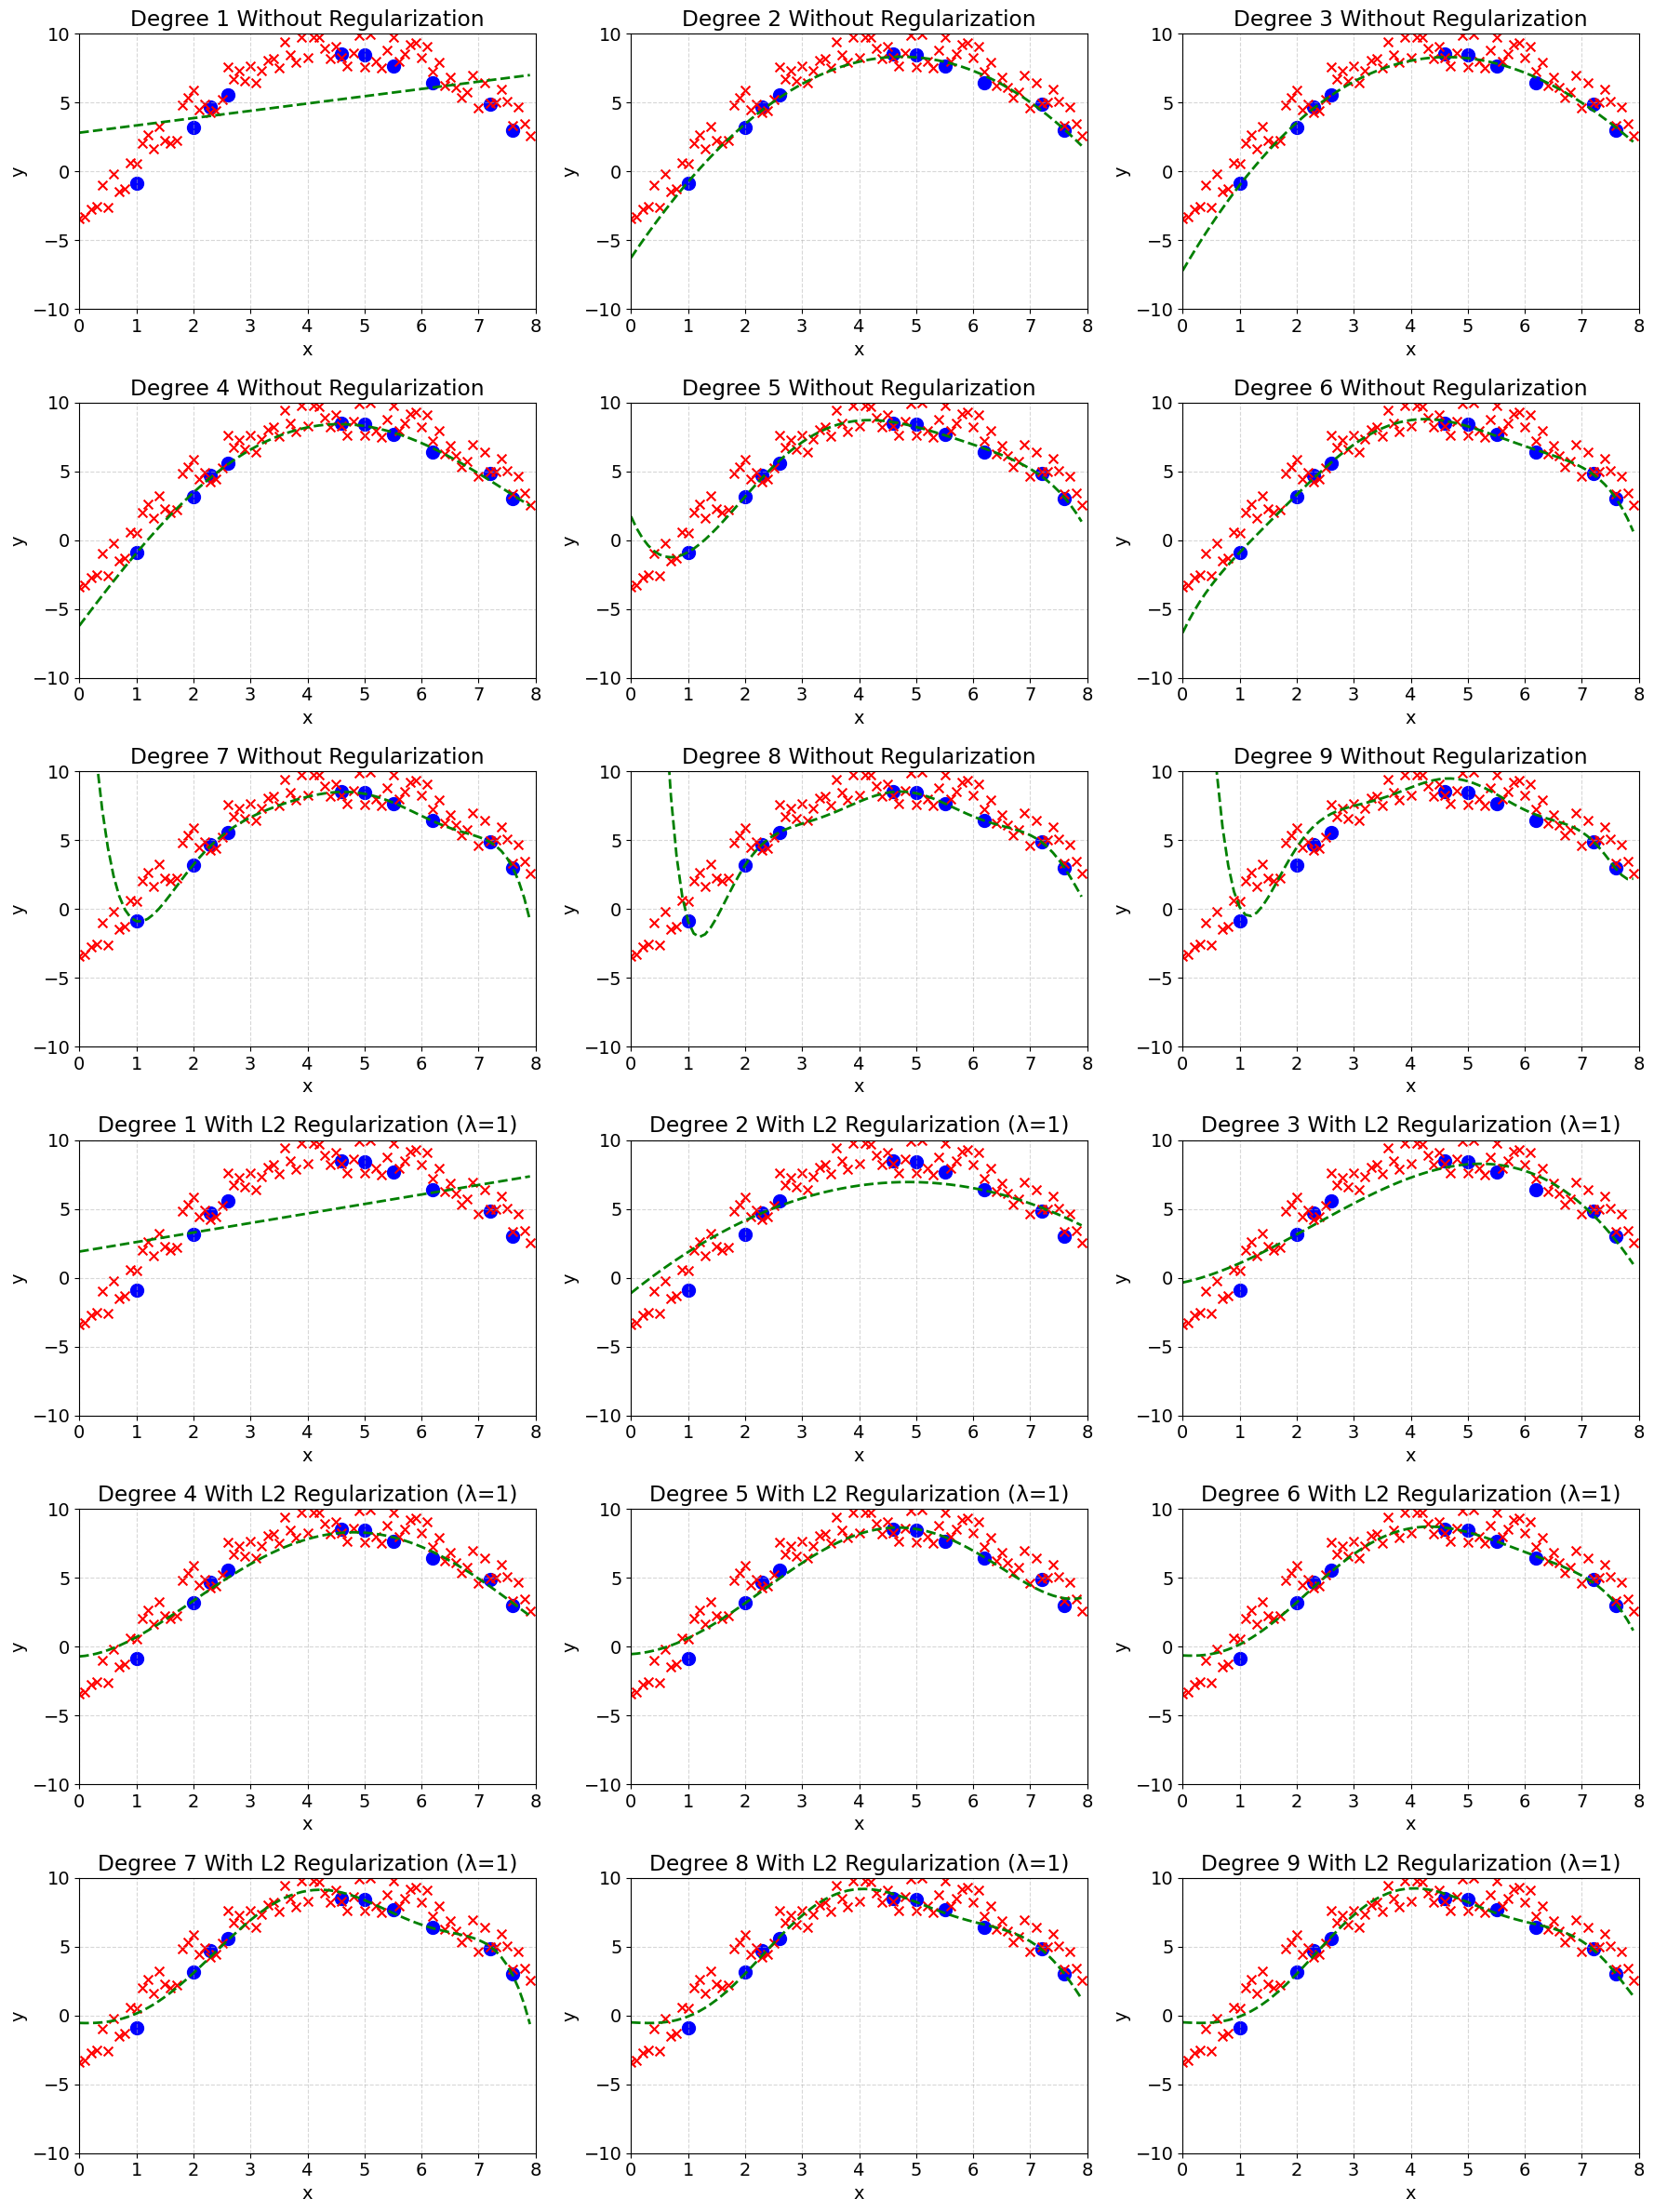

In [23]:
import matplotlib.pyplot as plt

# Define the range of polynomial degrees to plot
degrees = range(1, 10)  # Degrees from 1 to 9

# Initialize the figure for subplots (6 rows, 3 columns)
plt.figure(figsize=(18, 24))  # A larger figure to hold all subplots (6 rows, 3 columns)

# Loop through each polynomial degree and plot the corresponding regression fits
for idx, degree in enumerate(degrees): 
    # ==============================
    # Plot the Results Without Regularization
    # ==============================
    plt.subplot(6, 3, idx + 1)  # First 9 subplots for no regularization (1st degree to 9th degree)
    plt.scatter(x_train.flatten(), y_train, s=100, marker='o', color='blue', label='Training Data')
    plt.scatter(x_test, y_test, s=50, marker='x', color='red', label='Test Data')
    plt.plot(x_plot.flatten(), y_pred_no_reg[:, degree - 1], linestyle='--', linewidth=2, color='green', label='Fit Without Reg')
    
    # Set axis labels, title, and limits
    plt.title(f'Degree {degree} Without Regularization')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(0, 8)
    plt.ylim(-10, 10)
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # ==============================
    # Plot the Results With L2 Regularization
    # ==============================
    plt.subplot(6, 3, idx + 10)  # Next 9 subplots for L2 regularization (same degrees)
    plt.scatter(x_train.flatten(), y_train, s=100, marker='o', color='blue', label='Training Data')
    plt.scatter(x_test, y_test, s=50, marker='x', color='red', label='Test Data')
    plt.plot(x_plot.flatten(), y_pred_reg[:, degree - 1], linestyle='--', linewidth=2, color='green', label='Fit With L2 Reg')
    
    # Set axis labels, title, and limits
    plt.title(f'Degree {degree} With L2 Regularization (λ={regularization_lambda})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(0, 8)
    plt.ylim(-10, 10)
    plt.grid(True, linestyle='--', alpha=0.5)

# Adjust layout to prevent overlap between subplots
plt.tight_layout()

# Show the entire figure with all subplots
plt.show()

plt.close()

# Tip

Cell -> All Output -> Toggle Scrolling or just click the small window on the left to get rid of the output constrained in a small window with scroll bar.

# THE END

Feedback link: https://forms.gle/HdHMeF6Kkf9vLyia9.

Contact me if you have any questions!